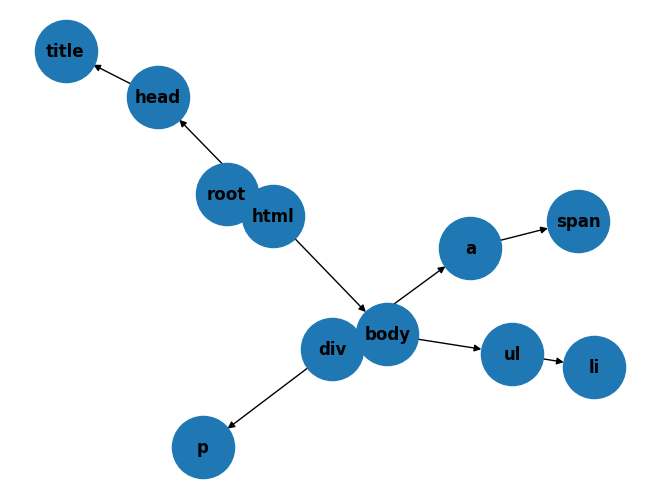

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample HTML DOM tree
html_dom_tree = {
    "html": {
        "head": {
            "title": {},
        },
        "body": {
            "div": {
                "p": {},
                "a": {
                    "span": {},
                },
            },
            "ul": {
                "li": {},
                "li": {},
                "li": {},
            },
        },
    },
}

def add_nodes_and_edges(graph, parent, children):
    for child, grandchildren in children.items():
        graph.add_node(child)
        graph.add_edge(parent, child)
        add_nodes_and_edges(graph, child, grandchildren)

# Create a directed graph
dom_graph = nx.DiGraph()

# Add nodes and edges to the graph
add_nodes_and_edges(dom_graph, "root", html_dom_tree)

# Draw the graph
pos = nx.spring_layout(dom_graph)  # Set layout for better visualization
nx.draw(dom_graph, pos, with_labels=True, font_weight='bold', node_size=2000)
plt.show()


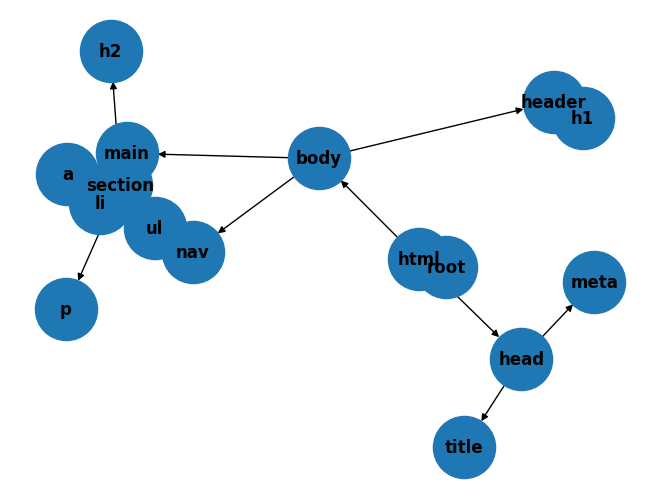

In [9]:
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt
from bs4.element import Tag


def create_dom_graph(html_content):
    dom_graph = nx.DiGraph()

    soup = BeautifulSoup(html_content, 'html.parser')

    def add_nodes_and_edges(parent, children):
        for child in children:
            if child.name is not None and isinstance(child, Tag):
                dom_graph.add_node(child.name)
                dom_graph.add_edge(parent, child.name)
                add_nodes_and_edges(child.name, child.children)


    add_nodes_and_edges('root', soup.children)

    return dom_graph

def draw_dom_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=2000)
    plt.show()

# Load your index.html file
with open('test_data/index.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Create and draw the DOM graph
dom_graph = create_dom_graph(html_content)
draw_dom_graph(dom_graph)


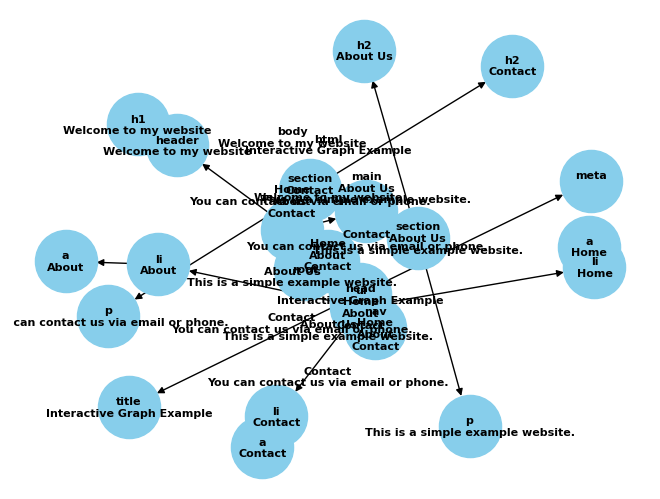

In [10]:
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt
from bs4.element import Tag

def create_dom_graph(html_content):
    dom_graph = nx.DiGraph()

    soup = BeautifulSoup(html_content, 'html.parser')

    def add_nodes_and_edges(parent, children):
        for child in children:
            if isinstance(child, Tag):
                content = child.get_text().strip()
                label = f"{child.name}\n{content}"
                dom_graph.add_node(label)
                dom_graph.add_edge(parent, label)
                add_nodes_and_edges(label, child.children)

    add_nodes_and_edges('root', soup.children)

    return dom_graph

def draw_dom_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_size=8, font_color='black', font_weight='bold', node_size=2000, node_color='skyblue')
    plt.show()

# Load your index.html file
with open('test_data/index.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Create and draw the DOM graph
dom_graph = create_dom_graph(html_content)
draw_dom_graph(dom_graph)


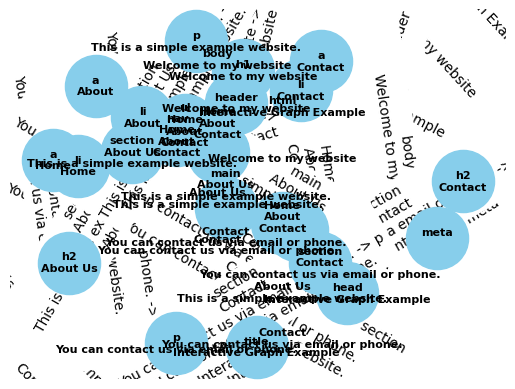

In [7]:
from bs4 import BeautifulSoup
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from bs4.element import Tag

class DOMGraphDrawer:
    def __init__(self, graph):
        self.graph = graph
        self.fig, self.ax = plt.subplots()
        self.pos = nx.spring_layout(self.graph)
        self.node_labels = nx.get_node_attributes(self.graph, 'label')
        self.edge_labels = {(u, v): f"{u} -> {v}" for u, v in self.graph.edges()}
        self.draw()

    def draw(self):
        nx.draw_networkx_nodes(self.graph, self.pos, ax=self.ax, node_size=2000, node_color='skyblue')
        nx.draw_networkx_labels(self.graph, self.pos, labels=self.node_labels, font_size=8, font_color='black', font_weight='bold', ax=self.ax)
        nx.draw_networkx_edges(self.graph, self.pos, ax=self.ax)
        nx.draw_networkx_edge_labels(self.graph, self.pos, edge_labels=self.edge_labels, ax=self.ax)
        plt.axis('off')
        plt.show()

def create_dom_graph(html_content):
    dom_graph = nx.DiGraph()

    soup = BeautifulSoup(html_content, 'html.parser')

    def add_nodes_and_edges(parent, children):
        for child in children:
            if isinstance(child, Tag):
                content = child.get_text().strip()
                label = f"{child.name}\n{content}"
                dom_graph.add_node(label, label=label)
                dom_graph.add_edge(parent, label)
                add_nodes_and_edges(label, child.children)

    add_nodes_and_edges('root', soup.children)

    return dom_graph

# Load your index.html file
with open('test_data/index.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Create DOM graph
dom_graph = create_dom_graph(html_content)

# Make it interactive
drawer = DOMGraphDrawer(dom_graph)
plt.show()


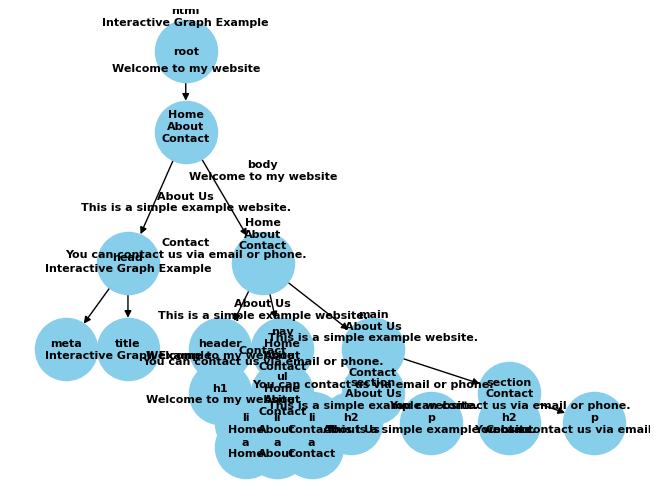

In [3]:
from bs4 import BeautifulSoup
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
from bs4.element import Tag

def create_dom_graph(html_content):
    dom_graph = nx.DiGraph()

    soup = BeautifulSoup(html_content, 'html.parser')

    def add_nodes_and_edges(parent, children):
        for child in children:
            if isinstance(child, Tag):
                content = child.get_text().strip()
                label = f"{child.name}\n{content}"
                dom_graph.add_node(label, label=label)
                dom_graph.add_edge(parent, label)
                add_nodes_and_edges(label, child.children)

    add_nodes_and_edges('root', soup.children)

    return dom_graph

def draw_tree(graph):
    pos = graphviz_layout(graph, prog="dot")
    nx.draw(graph, pos, with_labels=True, font_size=8, font_color='black', font_weight='bold', node_size=2000, node_color='skyblue')
    plt.show()

# Load your index.html file
with open('test_data/index.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Create DOM graph
dom_graph = create_dom_graph(html_content)

# Draw the DOM tree in tree format
draw_tree(dom_graph)


In [17]:
import torch
from torch import nn
import torch.nn.functional as F
import networkx as nx
from bs4 import BeautifulSoup

class GraphAttentionLayer(nn.Module):
    def __init__(self, in_channels, out_channels, alpha=0.2, dropout=0.6):
        super(GraphAttentionLayer, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.alpha = alpha
        self.dropout_rate = dropout

        self.W = nn.Linear(in_channels, out_channels, bias=False)
        self.a = nn.Parameter(torch.zeros(size=(1, 2 * out_channels)))
        nn.init.xavier_uniform_(self.W.weight.data)

        self.leakyrelu = nn.LeakyReLU(self.alpha)
        self.dropout = nn.Dropout(self.dropout_rate)

    def forward(self, h, adjacency_matrix):
        Wh = self.W(h)
        a_input = torch.cat([Wh.repeat(1, Wh.shape[0]), Wh.repeat(Wh.shape[0], 1)], dim=-1)
        #a_input = torch.cat([Wh.repeat(Wh.shape[0], 1), Wh.repeat(1, Wh.shape[0])], dim=-1)

        e = self.leakyrelu(torch.matmul(a_input, self.a.t()).squeeze(1))
        zero_vec = -9e15 * torch.ones_like(e)
        attention = torch.where(adjacency_matrix > 0, e, zero_vec)

        attention = F.softmax(attention, dim=1)
        attention = self.dropout(attention)

        h_prime = torch.matmul(attention, Wh)
        return h_prime
class GraphAttentionNetwork(nn.Module):
    def __init__(self, input_dim, gat_hidden_channels, gat_out_channels):
        super(GraphAttentionNetwork, self).__init__()
        self.gat1 = GraphAttentionLayer(input_dim, gat_hidden_channels)
        self.gat2 = GraphAttentionLayer(gat_hidden_channels, gat_out_channels)

    def forward(self, node_features, adjacency_matrix):
        h = self.gat1(node_features, adjacency_matrix)
        h = nn.functional.elu(h)
        h = self.gat2(h, adjacency_matrix)
        return torch.mean(h, dim=0)


class TreeEmbedding(nn.Module):
    def __init__(self, dim, vocab_size):
        super(TreeEmbedding, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, dim, sparse=True)

    def forward(self, node, offsets):
        if isinstance(node, str):
            char_indices = torch.tensor([max(0, min(ord(char), self.embedding.num_embeddings - 1))
                                         for char in node])
            word_length = len(char_indices)

            char_indices = nn.functional.pad(char_indices, (0, self.embedding.bag_size - word_length), value=0)

            return self.embedding(char_indices, offsets)

class HtmlToEmbeddings(nn.Module):
    def __init__(self, dim, gat_hidden_channels=128, gat_out_channels=64):
        super(HtmlToEmbeddings, self).__init__()
        self.dim = dim
        self.tree_embedding_model = TreeEmbedding(dim, vocab_size=0)
        self.graph_embedding_model = GraphAttentionNetwork(dim, gat_hidden_channels, gat_out_channels)

    def forward(self, html):
        tree = self.parse_html_to_tree(html)
        vocab_size = self.compute_vocab_size(tree)
        self.tree_embedding_model = TreeEmbedding(dim=self.dim, vocab_size=vocab_size)

        graph = self.construct_graph_from_tree(tree)
        tree_embedding = self.generate_tree_embedding(tree)
        graph_embedding = self.generate_graph_embedding(graph)

        assert tree_embedding.shape[1] == graph_embedding.shape[1], "Incompatible dimensions for concatenation"

        return torch.cat((tree_embedding, graph_embedding), dim=1)

    def parse_html_to_tree(self, html):
        soup = BeautifulSoup(html, 'html.parser')
        return soup.body

    def compute_vocab_size(self, node):
        chars = set()
        self.collect_chars(node, chars)
        return len(chars)

    def collect_chars(self, node, char_set):
        if isinstance(node, str):
            char_set.update(node)
        else:
            for child in node.children:
                self.collect_chars(child, char_set)

    def construct_graph_from_tree(self, tree):
        graph = nx.DiGraph()
        self.add_edges_recursive(graph, None, tree)
        return graph

    def add_edges_recursive(self, graph, parent, node):
        if isinstance(node, str):
            pass
        else:
            for child in node.children:
                graph.add_edge(id(parent), id(child))
                self.add_edges_recursive(graph, child, child)

    def generate_tree_embedding(self, node):
        if isinstance(node, str):
            return self.tree_embedding_model(node, torch.tensor([0]))
        else:
            try:
                return torch.cat([self.generate_tree_embedding(child) for child in node.children], dim=1)
            except AttributeError:  # Handle empty trees
                return torch.zeros(1, self.dim)  # Return a placeholder embedding

    def generate_graph_embedding(self, graph):
        num_nodes = len(graph.nodes())
        node_features = torch.eye(num_nodes)
        adjacency_matrix = torch.Tensor(nx.adjacency_matrix(graph).todense()).float()

        # Dynamically adjust the input size for GraphAttentionNetwork
        input_size = node_features.shape[1] if node_features is not None else adjacency_matrix.shape[1]
        self.graph_embedding_model = GraphAttentionNetwork(input_dim=input_size, gat_hidden_channels=16, gat_out_channels=16)

        return self.graph_embedding_model(torch.tensor(node_features) if node_features is not None else torch.tensor(adjacency_matrix),
                                           torch.tensor(adjacency_matrix))


# Example usage:
if __name__ == "__main__":
    html_embedding_model = HtmlToEmbeddings(dim=11)

    with open('test_data/index.html', 'r', encoding='utf-8') as file:
        html_input = file.read()

    embedding_output = html_embedding_model(html_input)
    print("Embedding Shape:", embedding_output.shape)


/tmp/ipykernel_10949/1153363156.py:131: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.graph_embedding_model(torch.tensor(node_features) if node_features is not None else torch.tensor(adjacency_matrix),
/tmp/ipykernel_10949/1153363156.py:132: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(adjacency_matrix))


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 47 but got size 2209 for tensor number 1 in the list.

In [58]:
import torch
from torch import nn
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
import networkx as nx
from bs4 import BeautifulSoup

class GraphAttentionLayer(nn.Module):
    def __init__(self, in_channels, out_channels, heads=1, dropout=0.6):
        super(GraphAttentionLayer, self).__init__()
        self.gat_conv = GATConv(in_channels, out_channels, heads=heads, dropout=dropout)

    def forward(self, x, edge_index):
        x = self.gat_conv(x, edge_index)
        return x

class GraphAttentionNetwork(nn.Module):
    def __init__(self, input_dim, gat_hidden_channels, gat_out_channels):
        super(GraphAttentionNetwork, self).__init__()
        self.gat1 = GraphAttentionLayer(input_dim, gat_hidden_channels)
        self.gat2 = GraphAttentionLayer(gat_hidden_channels * self.gat1.gat_conv.heads, gat_out_channels)

    def forward(self, node_features, edge_index):
        h = self.gat1(node_features, edge_index)
        h = nn.functional.elu(h)
        h = self.gat2(h, edge_index)
        return torch.mean(h, dim=0)

class TreeEmbedding(nn.Module):
    def __init__(self, dim, vocab_size):
        super(TreeEmbedding, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, dim, sparse=True)

    def forward(self, node, offsets):
        if isinstance(node, str):
            char_indices = torch.tensor([max(0, min(ord(char), self.embedding.num_embeddings - 1))
                                         for char in node])
            word_length = len(char_indices)

            char_indices = nn.functional.pad(char_indices, (0, self.embedding.bag_size - word_length), value=0)

            return self.embedding(char_indices, offsets)

class HtmlToEmbeddings(nn.Module):
    def __init__(self, dim, gat_hidden_channels=128, gat_out_channels=64):
        super(HtmlToEmbeddings, self).__init__()
        self.dim = dim
        self.tree_embedding_model = TreeEmbedding(dim, vocab_size=0)
        self.graph_embedding_model = GraphAttentionNetwork(dim, gat_hidden_channels, gat_out_channels)

    def forward(self, html):
        tree = self.parse_html_to_tree(html)
        vocab_size = self.compute_vocab_size(tree)
        self.tree_embedding_model = TreeEmbedding(dim=self.dim, vocab_size=vocab_size)

        graph = self.construct_graph_from_tree(tree)
        graph_embedding = self.generate_graph_embedding(graph)
        tree_embedding = self.generate_tree_embedding(tree)
        print(tree_embedding.shape, graph_embedding.shape)
        

        #assert tree_embedding.shape[1] == graph_embedding.shape[1], "Incompatible dimensions for concatenation"

        return tree_embedding, graph_embedding #torch.cat((tree_embedding, graph_embedding), dim=1)

    def parse_html_to_tree(self, html):
        soup = BeautifulSoup(html, 'html.parser')
        return soup.body

    def compute_vocab_size(self, node):
        chars = set()
        self.collect_chars(node, chars)
        return len(chars)

    def collect_chars(self, node, char_set):
        if isinstance(node, str):
            char_set.update(node)
        else:
            for child in node.children:
                self.collect_chars(child, char_set)

    def construct_graph_from_tree(self, tree):
        graph = nx.DiGraph()
        mapping = {}  # Mapping from original node identifiers to consecutive integers

        def add_edges_recursive(parent_id, node):
            nonlocal graph
            nonlocal mapping

            if isinstance(node, str):
                pass
            else:
                for child in node.children:
                    child_id = mapping.setdefault(id(child), len(mapping))
                    graph.add_edge(parent_id, child_id)
                    add_edges_recursive(child_id, child)

        root_id = mapping.setdefault(id(tree), len(mapping))
        add_edges_recursive(root_id, tree)
        return graph


    def generate_tree_embedding(self, node):
        if isinstance(node, str):
            return self.tree_embedding_model(node, torch.tensor([0]))
        else:
            try:
                return torch.cat([self.generate_tree_embedding(child) for child in node.children], dim=1)
            except AttributeError:  # Handle empty trees
                return torch.zeros(1, self.dim)  # Return a placeholder embedding

    def generate_graph_embedding(self, graph):
        num_nodes = len(graph.nodes())
        node_features = torch.eye(num_nodes)
        edge_index = torch.tensor(list(graph.edges)).t().contiguous()

        # Dynamically adjust the input size for GraphAttentionNetwork
        input_size = node_features.shape[1] if node_features is not None else edge_index.max().item() + 1
        self.graph_embedding_model = GraphAttentionNetwork(input_dim=input_size, gat_hidden_channels=16, gat_out_channels=16)

        return self.graph_embedding_model(torch.tensor(node_features) if node_features is not None else torch.tensor(edge_index),
                                           edge_index)

# Example usage:
if __name__ == "__main__":
    html_embedding_model = HtmlToEmbeddings(dim=11)

    with open('test_data/index.html', 'r', encoding='utf-8') as file:
        html_input = file.read()

    embedding_tree, embedding_graph = html_embedding_model(html_input)
    print("Embedding tree and graph:", embedding_tree, embedding_output)


torch.Size([1, 11]) torch.Size([16])
Embedding tree and graph: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]) (tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), tensor([-0.0337, -0.0641,  0.0152, -0.0186, -0.0419,  0.0258,  0.0094, -0.0132,
         0.0888,  0.0095, -0.0640, -0.0101, -0.0017,  0.0225,  0.0030,  0.0075],
       grad_fn=<MeanBackward1>))


/tmp/ipykernel_10949/2110975746.py:121: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.graph_embedding_model(torch.tensor(node_features) if node_features is not None else torch.tensor(edge_index),


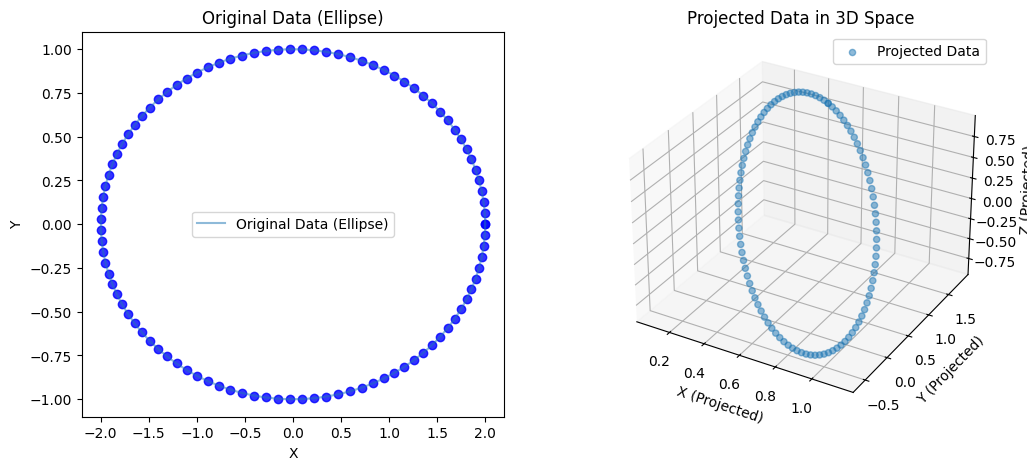

In [13]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Generate data points forming a 2D ellipse
theta = torch.linspace(0, 2 * np.pi, 100)
x = 2 * torch.cos(theta)
y = torch.sin(theta)

# Combine x and y into a 2D input tensor
data_points = torch.stack((x, y), dim=1)

# Linear projection layer
projection = nn.Linear(2, 3)  # Project from 2D to 3D

# Apply linear projection
projected_points = projection(data_points)

# Visualize the original and projected data
fig = plt.figure(figsize=(12, 5))

# Plot the original data points forming an ellipse
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(x.numpy(), y.numpy(), label="Original Data (Ellipse)", alpha=0.5)
ax1.scatter(data_points[:, 0], data_points[:, 1], color='blue', alpha=0.8)
ax1.legend()
ax1.set_title("Original Data (Ellipse)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

# Plot the projected data points in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.scatter(projected_points[:, 0].detach().numpy(), 
            projected_points[:, 1].detach().numpy(), 
            projected_points[:, 2].detach().numpy(), 
            label="Projected Data", alpha=0.5)
ax2.set_title("Projected Data in 3D Space")
ax2.set_xlabel("X (Projected)")
ax2.set_ylabel("Y (Projected)")
ax2.set_zlabel("Z (Projected)")
ax2.legend()

plt.show()


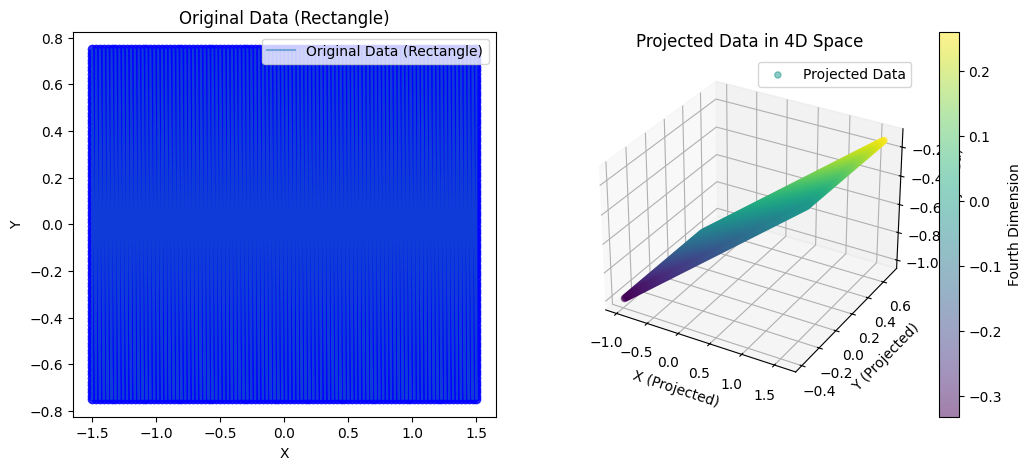

In [12]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate data points forming a rectangle
width = 3.0
height = 1.5

x = torch.linspace(-width/2, width/2, 100)
y = torch.linspace(-height/2, height/2, 100)

# Combine x and y into a 2D input tensor
data_points = torch.stack(torch.meshgrid(x, y), dim=2).view(-1, 2)

# Linear projection layer
projection = nn.Linear(2, 600)  # Project from 2D to 4D

# Apply linear projection
projected_points = projection(data_points)

# Visualize the original and projected data
fig = plt.figure(figsize=(12, 5))

# Plot the original data points forming a rectangle
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(data_points[:, 0].numpy(), data_points[:, 1].numpy(), label="Original Data (Rectangle)", alpha=0.5)
ax1.scatter(data_points[:, 0], data_points[:, 1], color='blue', alpha=0.8)
ax1.legend()
ax1.set_title("Original Data (Rectangle)")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

# Plot the projected data points in 4D with color representing the fourth dimension
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
sc = ax2.scatter(
    projected_points[:, 0].detach().numpy(),
    projected_points[:, 1].detach().numpy(),
    projected_points[:, 2].detach().numpy(),
    c=projected_points[:, 3].detach().numpy(),  # Use color to represent the fourth dimension
    cmap='viridis',  # Choose a colormap
    label="Projected Data",
    alpha=0.5
)
ax2.set_title("Projected Data in 4D Space")
ax2.set_xlabel("X (Projected)")
ax2.set_ylabel("Y (Projected)")
ax2.set_zlabel("Z (Projected)")
ax2.legend()

# Add a colorbar to the 3D plot
cb = plt.colorbar(sc, ax=ax2)
cb.set_label("Fourth Dimension")

plt.show()


In [62]:
import torch
import matplotlib.pyplot as plt
import networkx as nx

# Assuming you have the `embedding_tree` and `embedding_graph` obtained from the model
html_embedding_model = HtmlToEmbeddings(dim=11)

with open('test_data/index.html', 'r', encoding='utf-8') as file:
    html_input = file.read()

embedding_tree, embedding_graph = html_embedding_model(html_input)

# Assuming `tree` is the parsed HTML tree and `graph` is the NetworkX graph
tree = html_embedding_model.parse_html_to_tree(html_input)
graph = html_embedding_model.construct_graph_from_tree(tree)

# Function to decode the tensor to original text
def decode_tree_embedding(embedding):
    # Implement decoding logic based on your encoding logic
    # Here, we'll simply convert the embedding indices back to characters
    return ''.join(chr(int(idx.item())) for idx in embedding.view(-1))

# Assuming that each character is represented by one dimension in the embedding
decoded_tree = decode_tree_embedding(embedding_tree)
print("Decoded Tree:", decoded_tree)

# Function to plot the tree
def plot_tree(tree, embedding_tree):
    G = nx.DiGraph()
    mapping = {}  # Mapping from original node identifiers to consecutive integers

    def add_nodes_recursive(node, embedding, parent_id=None):
        nonlocal G
        nonlocal mapping

        if isinstance(node, str):
            node_id = mapping.setdefault(id(node), len(mapping))
            G.add_node(node_id, label=node)
            if parent_id is not None:
                G.add_edge(parent_id, node_id)
        else:
            for i, child in enumerate(node.children):
                child_id = mapping.setdefault(id(child), len(mapping))
                
                # Convert the tensor to a Python list, then check if the list is non-empty
                label_values = embedding[i].tolist()
                label_value = str(label_values[0]) if label_values else "EMPTY"
                
                G.add_node(child_id, label=label_value)
                if parent_id is not None:
                    G.add_edge(parent_id, child_id)
                add_nodes_recursive(child, embedding[i], child_id)  # Pass a single tensor element

    add_nodes_recursive(tree, embedding_tree)
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    nx.draw(G, pos, with_labels=True, font_weight='bold', labels=labels)
    plt.show()

# Function to plot the graph
def plot_graph(graph, embedding_graph):
    G = nx.Graph()
    G.add_nodes_from(range(len(graph.nodes())))
    G.add_edges_from(list(graph.edges))

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')

    nx.draw(G, pos, with_labels=True, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Plot the tree
plot_tree(tree, embedding_tree)

# Plot the graph
plot_graph(graph, embedding_graph)


torch.Size([1, 11]) torch.Size([16])
Decoded Tree:            


/tmp/ipykernel_10949/2110975746.py:121: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return self.graph_embedding_model(torch.tensor(node_features) if node_features is not None else torch.tensor(edge_index),


IndexError: index 1 is out of bounds for dimension 0 with size 1

AttributeError: 'PCA' object has no attribute 'reshape'

In [46]:
!pip install scikit-learn